# League of Legends Pro-Players performance trends compared in off-seasons and tournaments.

## Project Details

### Purpose
This project aims to **analyze and compare the performance trends of professional League of Legends players** over the course of a year, focusing on their **off-season games** and **official tournament matches**. By exploring statistical patterns and measurable outcomes, the goal is to evaluate whether off-season performance can serve as a predictor for tournament success.

---

### Performance Metrics

The following metrics are used to assess and compare the individual performance of pro players:

1. **Kill/Death/Assist (KDA) Ratio** – Represents a player's combat efficiency, calculated as *(Kills + Assists) / Deaths*. A higher KDA generally indicates more impactful play and fewer mistakes.

2. **Damage Dealt** – Measures the total damage a player inflicts on enemy champions, providing insight into their offensive contribution.

3. **Gold Earned per Minute (GPM)** – Captures how efficiently a player generates gold throughout a match, often through farming and objective control.

4. **Creep Score (CS)** – Tracks the number of minions or neutral monsters a player kills. It's a core indicator of farming ability and overall resource acquisition.

---

### Commonly Used Terms

- **Summoner** – Refers to the player.
- **Champion** – Refers to the character the player controls in-game.
- **Farming** – The act of killing minions or neutral monsters to gain gold and CS.

---

### Role Context

In League of Legends, each team consists of five unique roles:

- **Top Laner**
- **Jungler**
- **Mid Laner**
- **AD Carry (ADC)**
- **Support**

For the purpose of this analysis, the **Support role has been excluded**. Unlike other roles, support performance relies more on **team coordination, vision control, and utility**, rather than individually quantifiable metrics like KDA, CS, or gold. As such, this project focuses on roles with **clear, performance-driven statistics**.

---

### Selected Pro Players

The following players were selected based on their prominence, availability of data, and diversity across **roles, regions, and leagues**:

| Player        | Role       | Region         | League | Team             | Summoner / Account Name     |
|---------------|------------|----------------|--------|------------------|-----------------------------|
| **Faker**     | Mid Laner  | South Korea    | LCK    | T1               | Hide on bush                |
| **Chovy**     | Mid Laner  | South Korea    | LCK    | Gen.G            | 허거덩                       |
| **Ruler**     | ADC        | South Korea    | LPL    | JD Gaming        | 귀찮게하지마                 |
| **Caps**      | Mid Laner  | Denmark        | LEC    | G2 Esports       | G2 Caps                     |
| **Blaber**    | Jungler    | United States  | LCS    | Cloud9           | blaberfish2                 |
| **Zeus**      | Top Laner  | South Korea    | LCK    | T1               | Zeus10                      |
| **Hans Sama** | ADC        | France         | LEC    | G2 Esports       | G2 Hans Sama                |

These players represent a broad range of styles and strengths, providing a rich dataset for **cross-role** and **cross-region** performance analysis.


## 1. Import Libraries
We'll begin by importing the libraries needed for data analysis and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Gather the scraped data into csv files for each player

# 3. Process the data in the CSV files for each player

In [17]:
def enrich_player_data(filepath, player_name, match_type):
    df = pd.read_csv(filepath)
    
    # function to convert game time from its current format to something that can divide
    def parse_game_time(time_str):
        min_part, sec_part = time_str.strip().upper().split("M")
        minutes = int(min_part.strip())
        seconds = int(sec_part.replace("S", "").strip())
        return minutes + seconds / 60

    # Overall enrichment of the data using gametime, and making a personal performance indicator to use to compare
    df['GameMinutes'] = df['Game Time'].apply(parse_game_time)
    df['KDA'] = (df['Kills'] + df['Assists']) / df['Deaths'].replace(0, 1) # Calculate KDA, 0 becomes 1 to avoid division by zero, AKA Perfect KDA
    df['CS_per_min'] = df['CS'] / df['GameMinutes'] # Enrichment by converting CS to CS per minute
    df['Damage_per_min'] = df['Damage'] / df['GameMinutes'] # Enrichment by converting Damage to Damage per minute
    df['Gold_per_min'] = df['Gold'] / df['GameMinutes'] # Enrichment by converting Gold Earned to GE per minute
    df['Win'] = df['Win/Loss'].apply(lambda x: 1 if x.lower() == 'win' else 0) # Converting Win/Loss to 1/0 respectively

    # Creating a personal performance indicator giving weightage to different metrics
    df['PerformanceScore'] = ( 
        df['KDA'] * 0.3 +
        df['CS_per_min'] * 0.2 +
        df['Damage_per_min'] * 0.2 +
        df['Gold_per_min'] * 0.2 +
        df['Win'] * 0.1
    )
    df['Player'] = player_name
    df['MatchType'] = match_type
    return df

# Calling above function to enrich each player's DataFrame
# Calling the updated function to enrich each player's Offseason DataFrame
faker_off = enrich_player_data("data/faker_offseason_games.csv", "Faker", "Offseason")
chovy_off = enrich_player_data("data/chovy_offseason_games.csv", "Chovy", "Offseason")
ruler_off = enrich_player_data("data/ruler_offseason_games.csv", "Ruler", "Offseason")
caps_off = enrich_player_data("data/caps_offseason_games.csv", "Caps", "Offseason")
blaber_off = enrich_player_data("data/blaber_offseason_games.csv", "Blaber", "Offseason")
zeus_off = enrich_player_data("data/zeus_offseason_games.csv", "Zeus", "Offseason")
hanssama_off = enrich_player_data("data/hanssama_offseason_games.csv", "Hans Sama", "Offseason")


# Combine all enriched player DataFrames
all_players_df = pd.concat([faker, chovy, ruler, caps, blaber, zeus, hanssama], ignore_index=True)

# Showcasing the entire combined enriched player DataFrame, sorted by player
for player in all_players_df['Player'].unique():
    print(f"\n--- {player} ---")
    display(all_players_df[all_players_df['Player'] == player])



--- Faker ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
0,1,Jayce,12,2,7,327,70810,21258,Win,7.8,40M 09S,40.150000,9.500000,8.144458,1763.636364,529.464508,1,463.199066,Faker
1,2,Viktor,12,4,10,214,37472,13272,Win,8.8,26M 41S,26.683333,5.500000,8.019988,1404.322299,497.389132,1,383.696284,Faker
2,3,Orianna,5,4,4,220,23306,10333,Loss,5.4,23M 48S,23.800000,2.250000,9.243697,979.243697,434.159664,0,285.204412,Faker
3,4,Yone,4,7,16,234,29644,13445,Win,5.6,29M 41S,29.683333,2.857143,7.883212,998.674902,452.947782,1,292.858322,Faker
4,5,Yone,5,4,4,266,24291,13105,Loss,4.3,28M 28S,28.466667,2.250000,9.344262,853.313817,460.362998,0,265.279215,Faker
5,6,Sylas,3,4,11,180,22045,9443,Loss,5.4,26M 04S,26.066667,3.500000,6.905371,845.716113,362.263427,0,244.026982,Faker
6,7,Sylas,3,6,8,290,22854,13932,Loss,3.3,38M 33S,38.550000,1.833333,7.522698,592.840467,361.400778,0,192.902789,Faker
7,8,Viktor,7,3,10,207,25315,11464,Win,7.0,23M 59S,23.983333,5.666667,8.630994,1055.524670,477.998610,1,310.230855,Faker
8,9,Sylas,3,5,5,236,20173,11499,Loss,4.4,28M 26S,28.433333,1.600000,8.300117,709.484174,404.419695,0,224.920797,Faker
9,10,Galio,2,5,11,206,16990,10926,Loss,5.1,26M 52S,26.866667,2.600000,7.667494,632.382134,406.674938,0,210.124913,Faker



--- Chovy ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
10,1,Azir,6,8,6,209,23492,9576,Loss,5.0,25M 32S,25.533333,1.500000,8.185379,920.052219,375.039164,0,261.105352,Chovy
11,2,Zoe,12,6,12,201,37663,12593,Win,6.0,30M 45S,30.750000,4.000000,6.536585,1224.813008,409.528455,1,329.475610,Chovy
12,3,Corki,9,6,8,266,35799,14562,Win,5.7,29M 46S,29.766667,2.833333,8.936170,1202.653975,489.204927,1,341.109015,Chovy
13,4,Ahri,6,2,11,246,25873,12507,Win,10.0,25M 07S,25.116667,8.500000,9.794293,1030.112807,497.956204,1,310.222661,Chovy
14,5,Zoe,3,1,6,133,13753,7121,Win,9.1,15M 37S,15.616667,9.000000,8.516542,880.661686,455.987193,1,271.833084,Chovy
15,6,Corki,3,10,5,335,43207,15366,Loss,2.7,36M 20S,36.333333,0.800000,9.220183,1189.183486,422.917431,0,324.504220,Chovy
16,7,Xin Zhao,6,3,3,132,10453,7814,Win,5.4,19M 33S,19.550000,3.000000,6.751918,534.680307,399.693095,1,189.225064,Chovy
17,8,Viktor,6,5,10,215,29290,12959,Win,5.4,27M 33S,27.550000,3.200000,7.803993,1063.157895,470.381125,1,309.328603,Chovy
18,9,Jax,10,9,15,271,46416,17726,Loss,5.0,45M 20S,45.333333,2.777778,5.977941,1023.882353,391.014706,0,285.008333,Chovy
19,10,Sylas,18,10,11,225,59942,16088,Win,6.6,33M 04S,33.066667,2.900000,6.804435,1812.762097,486.532258,1,462.189758,Chovy



--- Ruler ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
20,1,Kaisa,9,7,10,296,34003,17579,Win,5.0,32M 43S,32.716667,2.714286,9.047376,1039.317371,537.310239,1,318.049283,Ruler
21,2,Kalista,8,3,8,142,19623,9798,Win,8.9,18M 25S,18.416667,5.333333,7.710407,1065.502262,532.018100,1,322.746154,Ruler
22,3,Jhin,1,3,3,95,7800,5146,Loss,4.2,15M 31S,15.516667,1.333333,6.122449,502.685285,331.643394,0,168.490226,Ruler
23,4,Xayah,16,6,12,308,50511,16470,Win,9.4,29M 41S,29.683333,4.666667,10.376193,1701.661988,554.856822,1,454.879001,Ruler
24,5,Ezreal,8,1,4,173,21703,10586,Win,10.0,18M 32S,18.533333,12.000000,9.334532,1171.025180,571.187050,1,354.009353,Ruler
25,6,Varus,4,1,3,170,10001,9075,Win,8.7,17M 36S,17.600000,7.000000,9.659091,568.238636,515.625000,1,220.904545,Ruler
26,7,Ezreal,4,3,6,181,15155,8573,Win,5.8,20M 31S,20.516667,3.333333,8.822096,738.667750,417.855402,1,234.169050,Ruler
27,8,Varus,16,10,7,288,50033,18988,Loss,5.6,38M 40S,38.666667,2.300000,7.448276,1293.956897,491.068966,0,359.184828,Ruler
28,9,Kaisa,13,9,10,321,50482,17760,Win,6.6,30M 49S,30.816667,2.555556,10.416441,1638.139535,576.311520,1,445.840166,Ruler
29,10,Kaisa,1,4,2,180,8255,8002,Loss,2.8,20M 36S,20.600000,0.750000,8.737864,400.728155,388.446602,0,159.807524,Ruler



--- Caps ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
30,1,Ryze,3,2,12,205,25098,11244,Win,7.1,28M 05S,28.083333,7.500000,7.299703,893.697329,400.379822,1,262.625371,Caps
31,2,Ryze,7,5,7,142,12229,8980,Win,6.4,19M 35S,19.583333,2.800000,7.251064,624.459574,458.553191,1,218.992766,Caps
32,3,Syndra,4,1,10,233,24047,12243,Win,7.2,24M 25S,24.416667,14.000000,9.542662,984.860068,501.419795,1,303.464505,Caps
33,4,Azir,8,10,11,289,33254,16789,Loss,4.1,43M 54S,43.900000,1.900000,6.583144,757.494305,382.437358,0,229.872961,Caps
34,5,Taliyah,2,6,4,217,13974,9733,Loss,3.0,27M 12S,27.200000,1.000000,7.977941,513.750000,357.830882,0,176.211765,Caps
35,6,Aurora,14,6,8,225,45407,16223,Win,7.1,32M 05S,32.083333,3.666667,7.012987,1415.283117,505.651948,1,386.789610,Caps
36,7,Zed,7,9,4,172,15768,10854,Loss,3.5,28M 32S,28.533333,1.222222,6.028037,552.616822,380.397196,0,188.175078,Caps
37,8,Taliyah,10,7,12,267,25916,16051,Win,6.1,34M 34S,34.566667,3.142857,7.724204,749.739634,464.349084,1,245.405442,Caps
38,9,Viktor,1,6,0,107,4641,4603,Loss,1.0,15M 12S,15.200000,0.166667,7.039474,305.328947,302.828947,0,123.089474,Caps
39,10,Gragas,6,8,2,179,17997,10269,Loss,2.6,24M 54S,24.900000,1.000000,7.188755,722.771084,412.409639,0,228.773896,Caps



--- Blaber ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
40,1,Khazix,6,3,10,194,16528,11014,Win,6.4,24M 21S,24.350000,5.333333,7.967146,678.767967,452.320329,1,229.511088,Blaber
41,2,Viego,10,9,5,193,20011,13504,Loss,4.0,29M 28S,29.466667,1.666667,6.549774,679.106335,458.280543,0,229.287330,Blaber
42,3,Vi,8,3,10,229,19827,13843,Win,7.4,28M 57S,28.950000,6.000000,7.910190,684.870466,478.169257,1,236.089983,Blaber
43,4,Lilliah,11,5,12,290,39073,17055,Win,8.1,32M 29S,32.483333,4.600000,8.927655,1202.863007,525.038481,1,348.845829,Blaber
44,5,Pantheon,9,3,5,195,21320,11977,Win,6.2,26M 20S,26.333333,4.666667,7.405063,809.620253,454.822785,1,255.869620,Blaber
45,6,Nidalee,9,4,17,186,28925,12391,Loss,8.5,29M 28S,29.466667,6.500000,6.312217,981.617647,420.509050,0,283.637783,Blaber
46,7,Viego,5,9,2,192,16734,12247,Loss,1.8,27M 59S,27.983333,0.777778,6.861227,597.998809,437.653365,0,208.736014,Blaber
47,8,Naafiri,5,4,7,198,15622,12066,Loss,5.3,28M 05S,28.083333,3.000000,7.050445,556.272997,429.649852,0,199.494659,Blaber
48,9,Lilliah,10,2,1,122,11684,7908,Win,9.6,15M 16S,15.266667,5.500000,7.991266,765.327511,517.991266,1,260.012009,Blaber
49,10,Zyra,3,1,11,155,10730,8335,Win,10.0,18M 04S,18.066667,14.000000,8.579336,593.911439,461.346863,1,217.067528,Blaber



--- Zeus ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
50,1,Mordekaiser,8,9,15,277,47959,16946,Win,4.8,43M 03S,43.050000,2.555556,6.434379,1114.030197,393.635308,1,303.686643,Zeus
51,2,Renekton,2,5,2,175,18145,7392,Loss,3.9,29M 52S,29.866667,0.800000,5.859375,607.533482,247.500000,0,172.418571,Zeus
52,3,Sion,5,8,6,210,20303,11788,Win,3.7,28M 53S,28.883333,1.375000,7.270629,702.931333,408.124639,1,224.177820,Zeus
53,4,Sion,1,7,5,216,20846,10833,Loss,2.5,27M 42S,27.700000,0.857143,7.797834,752.563177,391.083032,0,230.545952,Zeus
54,5,Renekton,3,9,3,207,20647,11264,Loss,2.2,28M 29S,28.483333,0.666667,7.267408,724.880047,395.459333,0,225.721358,Zeus
55,6,Akali,6,8,9,190,31174,11613,Win,4.8,29M 41S,29.683333,1.875000,6.400898,1050.218978,391.229646,1,290.232405,Zeus
56,7,Akali,13,3,10,239,36963,15587,Win,5.1,34M 01S,34.016667,7.666667,7.025968,1086.614405,458.216561,1,312.771387,Zeus
57,8,Viktor,4,5,2,181,21054,9380,Loss,4.8,21M 43S,21.716667,1.200000,8.334612,969.485802,431.926324,0,282.309348,Zeus
58,9,Ambessa,9,5,6,347,44664,18630,Win,6.3,36M 09S,36.150000,3.000000,9.598893,1235.518672,515.352697,1,353.094053,Zeus
59,10,Ambessa,7,3,7,267,36538,14569,Win,5.5,30M 49S,30.816667,4.666667,8.664143,1185.657112,472.763656,1,334.916982,Zeus



--- Hans Sama ---


,Game,Champion,Kills,Deaths,Assists,CS,Damage,Gold,Win/Loss,Performance(OP.GG),Game Time,GameMinutes,KDA,CS_per_min,Damage_per_min,Gold_per_min,Win,PerformanceScore,Player
60,1,Ezreal,9,9,8,292,56969,16288,Loss,4.4,39M 10S,39.166667,1.888889,7.455319,1454.527660,415.863830,0,376.136028,Hans Sama
61,2,Galio,8,5,18,286,34633,15337,Win,6.6,34M 57S,34.950000,5.200000,8.183119,990.929900,438.826896,1,289.247983,Hans Sama
62,3,Varus,6,11,5,146,16763,9621,Loss,3.2,24M 54S,24.900000,1.000000,5.863454,673.212851,386.385542,0,213.392369,Hans Sama
63,4,Tristana,1,6,10,356,20843,17031,Loss,3.2,43M 54S,43.900000,1.833333,8.109339,474.783599,387.949886,0,174.718565,Hans Sama
64,5,Tristana,5,4,2,147,13329,9033,Win,6.0,15M 33S,15.550000,1.750000,9.453376,857.170418,580.900322,1,290.129823,Hans Sama
65,6,Tristana,3,3,2,176,13172,8336,Loss,4.9,20M 34S,20.566667,1.666667,8.557536,640.453809,405.316045,0,211.365478,Hans Sama
66,7,Zeri,6,7,14,338,34938,17965,Loss,5.0,37M 24S,37.400000,2.857143,9.037433,934.171123,480.347594,0,285.568373,Hans Sama
67,8,Tristana,8,2,8,152,15935,9116,Win,10.0,18M 45S,18.750000,8.000000,8.106667,849.866667,486.186667,1,271.332000,Hans Sama
68,9,Ezreal,5,6,3,144,18020,7859,Loss,4.2,21M 03S,21.050000,1.333333,6.840855,856.057007,373.349169,0,247.649406,Hans Sama
69,10,Varus,8,4,6,290,28834,15246,Loss,5.5,33M 05S,33.083333,3.500000,8.765743,871.556675,460.836272,0,269.281738,Hans Sama


## Showcasing the Off-season performance visually using personal performance score

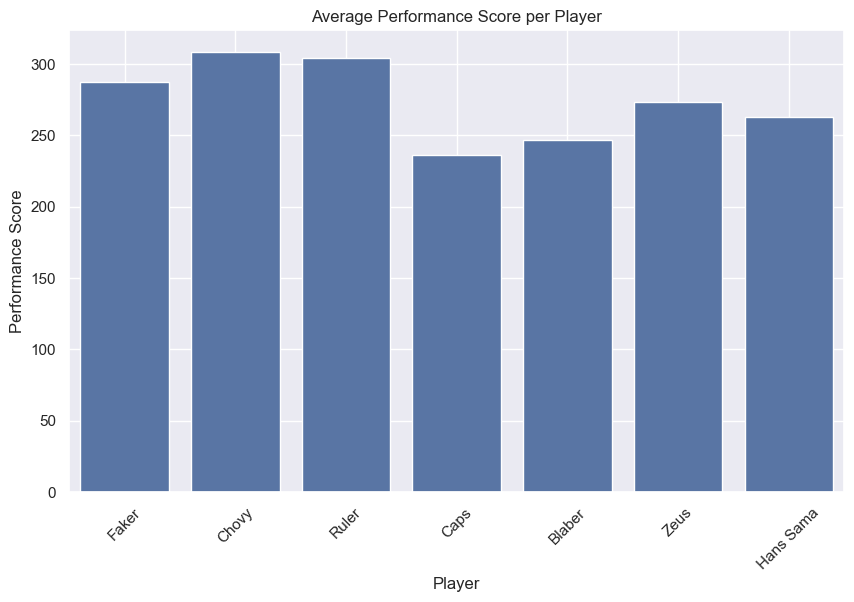

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=all_players_df, x='Player', y='PerformanceScore', errorbar=None)
plt.title("Average Performance Score per Player")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
